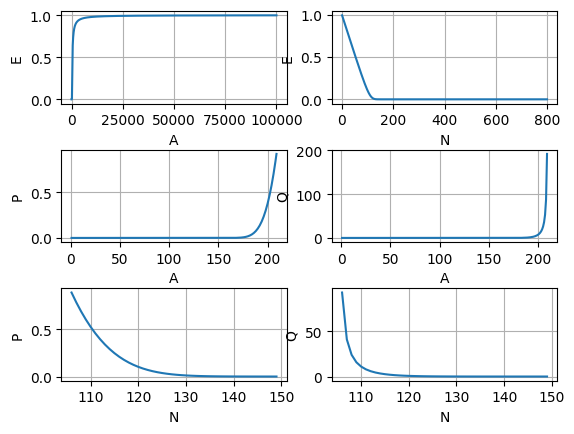

In [1]:
import numpy as np
import pylab

def probability_of_loss_M_M_V(i, A):
    if i == 0:
        return 1
    else:
        # по первой формуле Эрланга
        x = A * probability_of_loss_M_M_V(i - 1, A)
        E_i = x / (i + x)
        return E_i

def probability_of_loss_M_M_V_inf(V, A):
    E_V = probability_of_loss_M_M_V(V, A)
    P = E_V / (1 - (A / V) * (1 - E_V))
    return P

def avrg_queue_length(V, A):
    E_V = probability_of_loss_M_M_V(V, A)
    q = ((A * E_V) / ((V - A) + (A * E_V))) * (V / (V - A))
    return q

n = 105

pylab.subplot(3, 2, 1)
pylab.subplots_adjust(hspace=0.5)
A, E = [], []
N = 2 * n
A = list(range(1, 100000))
for i in range(len(A)):
    E.append(probability_of_loss_M_M_V(N, A[i]))
pylab.plot(A, E)
pylab.grid()
pylab.xlabel('A')
pylab.ylabel('E')

pylab.subplot(3, 2, 2)
A = n
N, E = [], []
N = list(range(1, 800))
for i in range(len(N)):
    E.append(probability_of_loss_M_M_V(N[i], A))
pylab.plot(N, E)
pylab.grid()
pylab.xlabel('N')
pylab.ylabel('E')

A, P, Q = [], [], []
N = 2 * n
A = list(range(1, N))  # A < N
for i in range(len(A)):
    P.append(probability_of_loss_M_M_V_inf(N, A[i]))
    Q.append(avrg_queue_length(N, A[i]))
pylab.subplot(3, 2, 3)
pylab.plot(A, P)
pylab.grid()
pylab.xlabel('A')
pylab.ylabel('P')

pylab.subplot(3, 2, 4)
pylab.plot(A, Q)
pylab.grid()
pylab.xlabel('A')
pylab.ylabel('Q')

A = n
N, P, Q = [], [], []
N = list(range(A + 1, 150))  # A < N
for i in range(len(N)):
    P.append(probability_of_loss_M_M_V_inf(N[i], A))
    Q.append(avrg_queue_length(N[i], A))
pylab.subplot(3, 2, 5)
pylab.plot(N, P)
pylab.grid()
pylab.xlabel('N')
pylab.ylabel('P')

pylab.subplot(3, 2, 6)
pylab.plot(N, Q)
pylab.grid()
pylab.xlabel('N')
pylab.ylabel('Q')

pylab.show()
exit()